# Import the necessary libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib as mlb # data visulaization er jnno
import matplotlib.pyplot as plt
import seaborn as sns #statistical visualization er jnno kaje lage

In [16]:
stock_data=pd.read_csv('Stock_Market_Data.csv')
stock_data.head()

,Date,Name,Open,High,Low,Close,Volume
0,02-01-2022,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,03-01-2022,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,04-01-2022,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,05-01-2022,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,06-01-2022,01.Bank,23.12,23.65,23.00,23.37,2586344.19


# Loading the dataset with pandas

In [17]:
# Read the CSV file
stock_data = pd.read_csv('Stock_Market_Data.csv')
# 1st 5 rows of dataset
stock_data.head()

,Date,Name,Open,High,Low,Close,Volume
0,02-01-2022,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,03-01-2022,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,04-01-2022,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,05-01-2022,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,06-01-2022,01.Bank,23.12,23.65,23.00,23.37,2586344.19


# Exploratory Data Analysis (EDA)

In [18]:
print(stock_data.shape)

# Check the data types
stock_data.dtypes


(49158, 7)


Date       object
Name       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [19]:
# Convert 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'], dayfirst = True)

In [20]:
stock_data.dtypes

Date      datetime64[ns]
Name              object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [21]:
# Calculate total volume for each company
volume_per_company = stock_data.groupby('Name')['Volume'].sum()

# Get the top 5 companies with the highest total volume
top_5_companies = volume_per_company.nlargest(5).index
top_5_companies.to_list()


['UNIONBANK', 'KEYACOSMET', 'BEXIMCO', 'FUWANGFOOD', 'IFIC']

# Part 3: Volatility Analysis:

# Calculate and plot the rolling standard deviation of the 'Close' prices.


C:\Users\HP\AppData\Local\Temp\ipykernel_16548\4077976159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Rolling_Std'] = company_data['Close'].rolling(window = 30).std()
C:\Users\HP\AppData\Local\Temp\ipykernel_16548\4077976159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Rolling_Std'] = company_data['Close'].rolling(window = 30).std()
C:\Users\HP\AppData\Local\Temp\ipykernel_16548\4077976159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

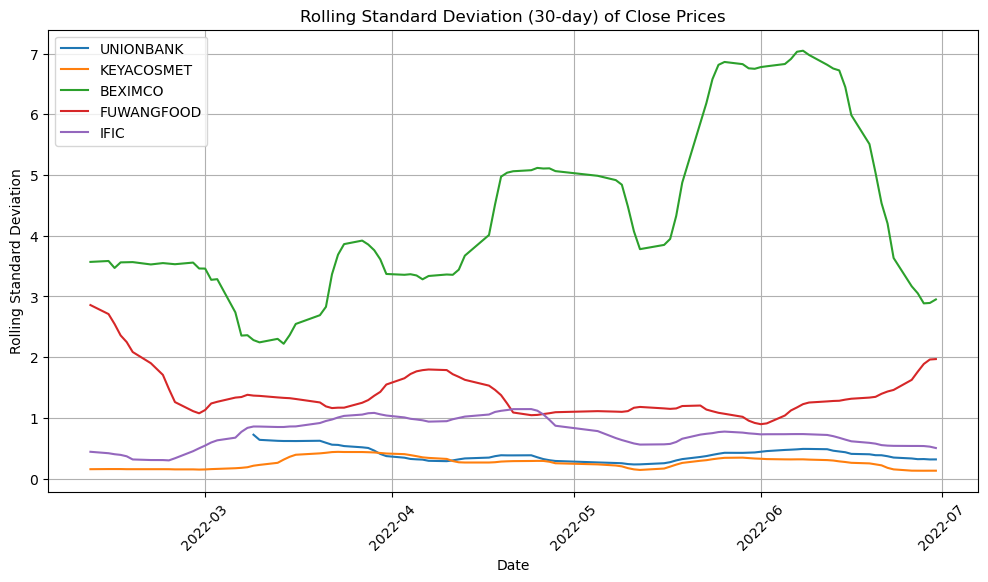

In [22]:
# Calculate and plot rolling standard deviation for each of the top 5 companies
plt.figure(figsize=(12, 6))
for name in top_5_companies:
    company_data = stock_data[stock_data['Name'] == name]
    company_data['Rolling_Std'] = company_data['Close'].rolling(window = 30).std()
    plt.plot(company_data['Date'], company_data['Rolling_Std'], label = f'{name}')

plt.title(f'Rolling Standard Deviation (30-day) of Close Prices')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.legend()
plt.grid()
plt.xticks(rotation = 45)
plt.show()


# Create a new column for daily price change (Close - Open)

In [23]:
stock_data['Daily_Price_Change'] = stock_data['Close'] - stock_data['Open']

# Display the updated DataFrame with the new column
stock_data.head()


,Date,Name,Open,High,Low,Close,Volume,Daily_Price_Change
0,2022-01-02,01.Bank,22.83,23.20,22.59,22.93,1842350.41,0.10
1,2022-01-03,01.Bank,23.03,23.29,22.74,22.90,1664989.63,-0.13
2,2022-01-04,01.Bank,22.85,23.13,22.64,22.84,1354510.97,-0.01
3,2022-01-05,01.Bank,22.91,23.20,22.70,22.98,1564334.81,0.07
4,2022-01-06,01.Bank,23.12,23.65,23.00,23.37,2586344.19,0.25


# Analyze the distribution of daily price changes.

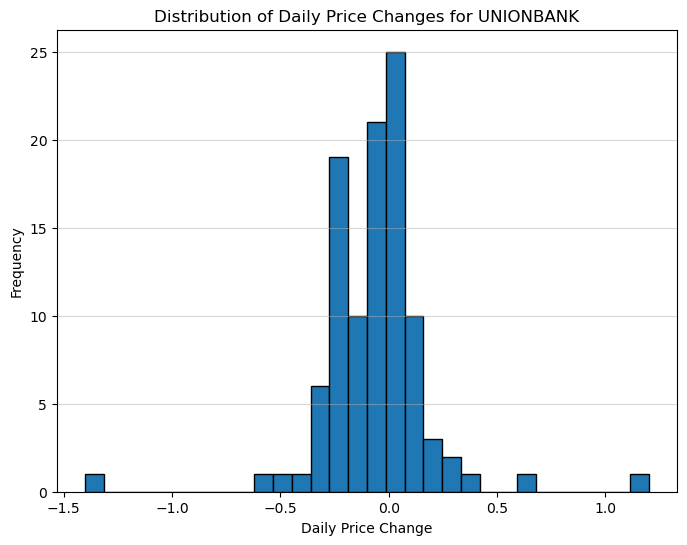

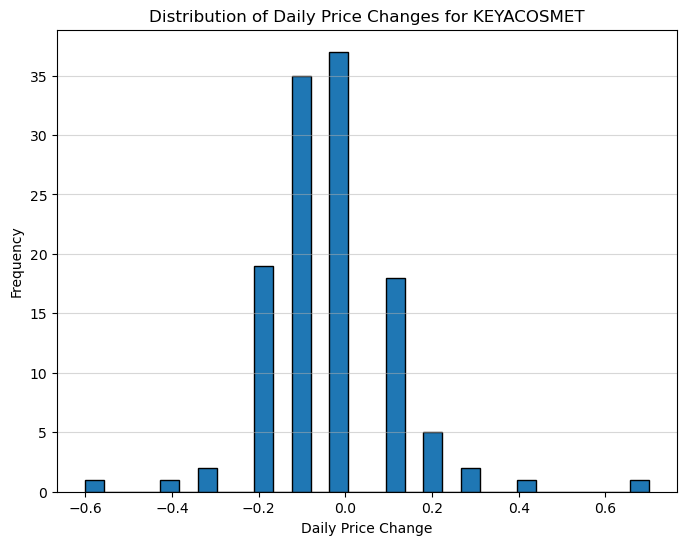

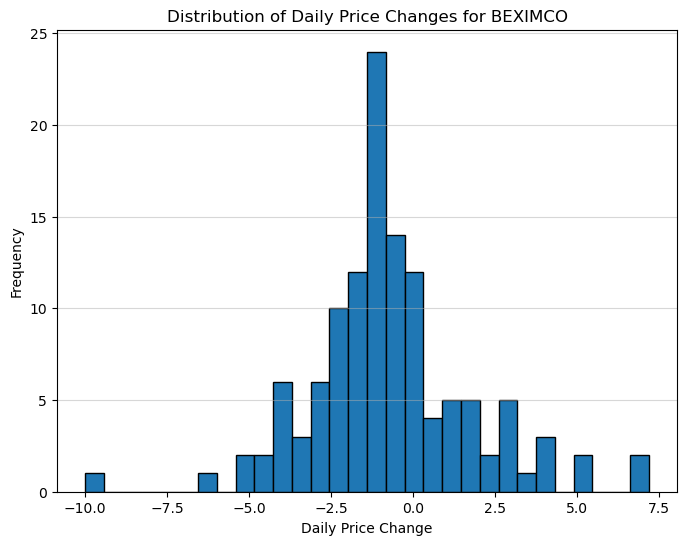

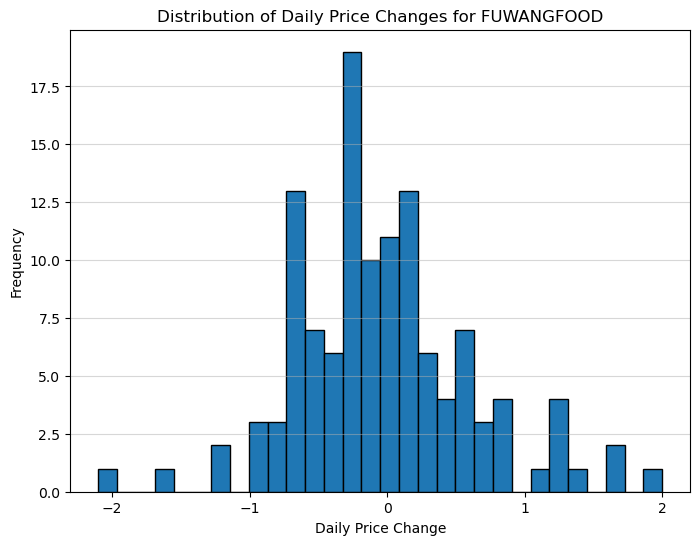

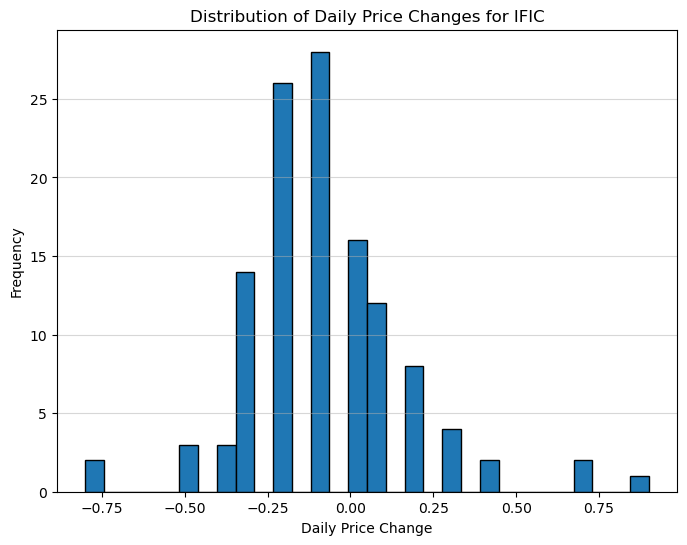

In [24]:
# Analyze distribution of daily price changes for top 5 companies
for name in top_5_companies:
    company_data = stock_data[stock_data['Name'] == name]

    plt.figure(figsize=(8, 6))
    plt.hist(company_data['Daily_Price_Change'], bins = 30, edgecolor='black')
    plt.title(f'Distribution of Daily Price Changes for {name}')
    plt.xlabel('Daily Price Change')
    plt.ylabel('Frequency')
    plt.grid(axis = 'y', alpha = 0.5)
    plt.show()


# Identify days with the largest price increases and decreases.

In [25]:
largest_increase_day = stock_data.loc[stock_data['Daily_Price_Change'].idxmax()]
largest_decrease_day = stock_data.loc[stock_data['Daily_Price_Change'].idxmin()]

print("Days with the Largest Price Increases:")
print(largest_increase_day)

print("\nDays with the Largest Price Decreases:")
print(largest_decrease_day)


Days with the Largest Price Increases:
Date                  2022-06-29 00:00:00
Name                           SJIBLPBOND
Open                               4710.0
High                               4899.0
Low                                4710.0
Close                              4897.0
Volume                              101.0
Daily_Price_Change                  187.0
Name: 48081, dtype: object

Days with the Largest Price Decreases:
Date                  2022-03-07 00:00:00
Name                           RECKITTBEN
Open                               5753.0
High                               5753.0
Low                                5550.0
Close                              5563.8
Volume                             1876.0
Daily_Price_Change                 -189.2
Name: 23365, dtype: object


# Identify stocks with unusually high trading volume on certain days.

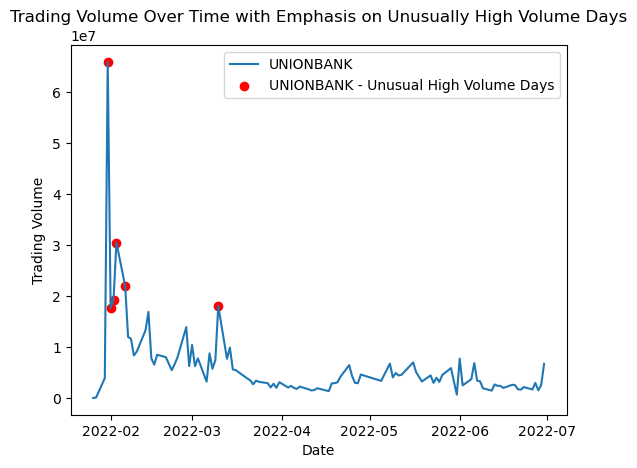

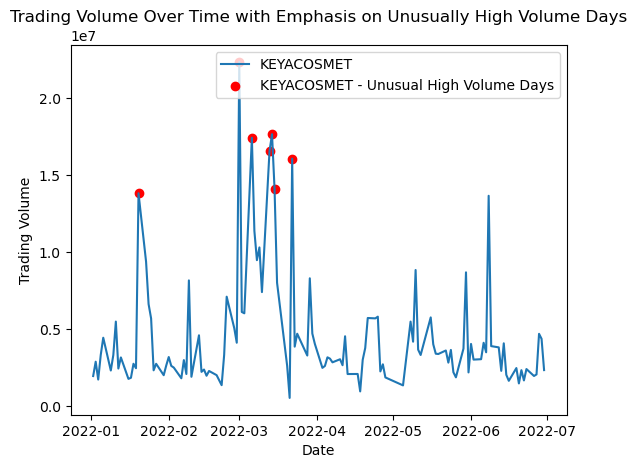

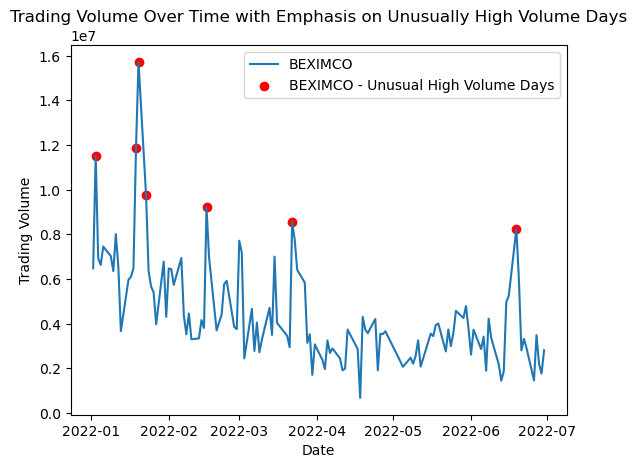

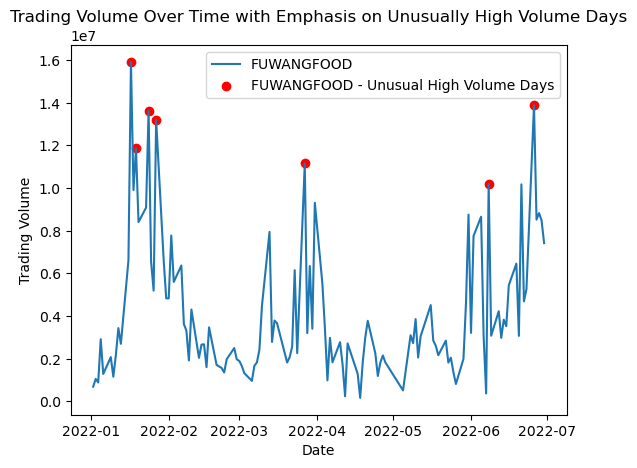

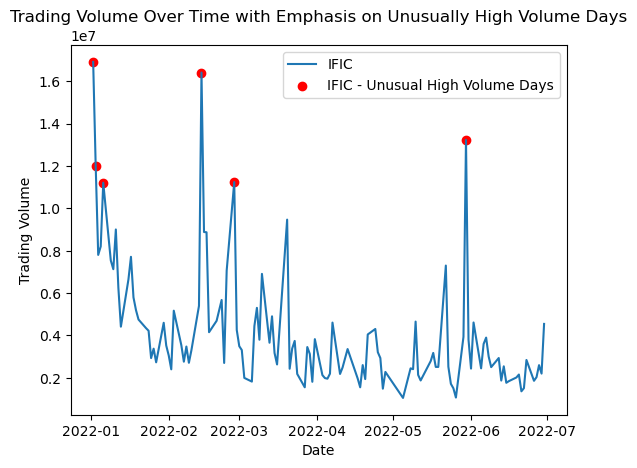

In [26]:
for name in top_5_companies:
    company_data = stock_data[stock_data['Name'] == name]
    plt.plot(company_data['Date'],company_data['Volume'],label = name)

    threshold = company_data['Volume'].quantile(0.95)
    unusual_high_volume_data = company_data[company_data['Volume'] > threshold]
    plt.scatter(unusual_high_volume_data['Date'], unusual_high_volume_data['Volume'], color="red", marker='o', label="{} - Unusual High Volume Days".format(name))

    plt.title('Trading Volume Over Time with Emphasis on Unusually High Volume Days')
    plt.xlabel('Date')
    plt.ylabel('Trading Volume')
    plt.legend()
    plt.show()


# Part 4: Correlation and Heatmaps

# Explore the relationship between trading volume and volatility.

C:\Users\HP\AppData\Local\Temp\ipykernel_16548\3965786842.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Rolling_Std'] = company_data['Close'].rolling(window = 30).std()


Correlation Coefficient of UNIONBANK: 0.35


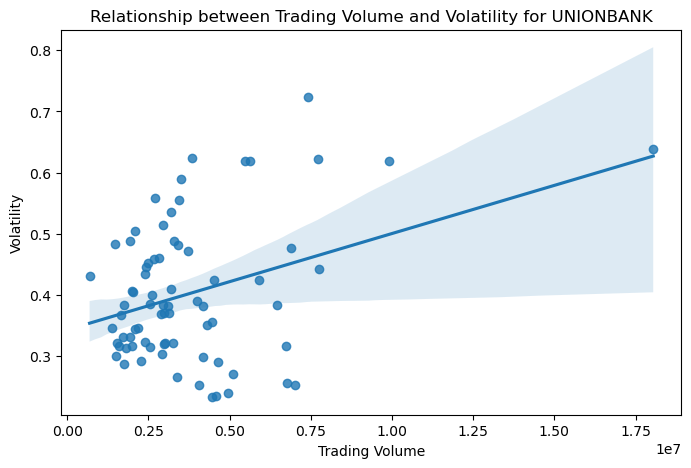

C:\Users\HP\AppData\Local\Temp\ipykernel_16548\3965786842.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Rolling_Std'] = company_data['Close'].rolling(window = 30).std()


Correlation Coefficient of KEYACOSMET: 0.00


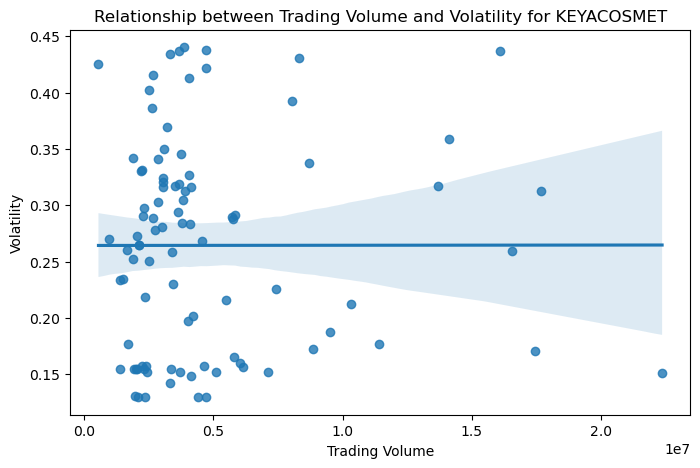

C:\Users\HP\AppData\Local\Temp\ipykernel_16548\3965786842.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Rolling_Std'] = company_data['Close'].rolling(window = 30).std()


Correlation Coefficient of BEXIMCO: -0.09


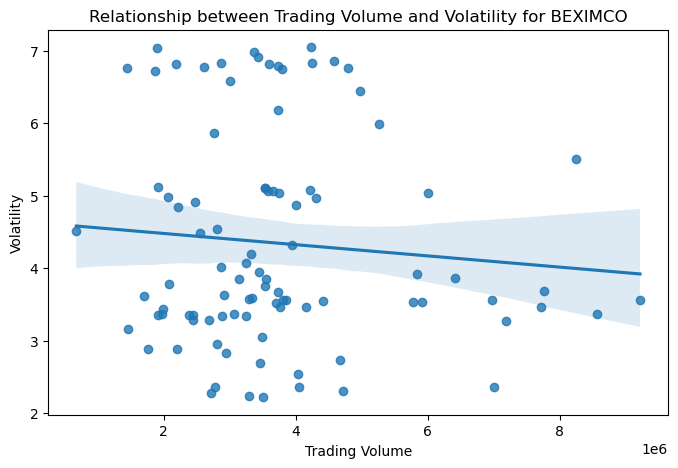

C:\Users\HP\AppData\Local\Temp\ipykernel_16548\3965786842.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Rolling_Std'] = company_data['Close'].rolling(window = 30).std()


Correlation Coefficient of FUWANGFOOD: 0.05


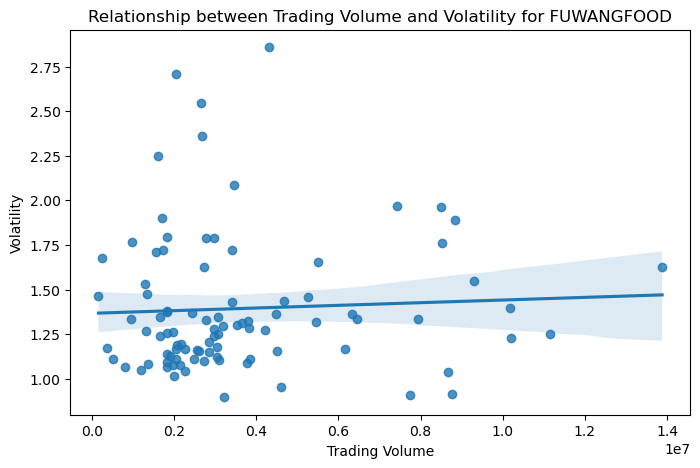

C:\Users\HP\AppData\Local\Temp\ipykernel_16548\3965786842.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Rolling_Std'] = company_data['Close'].rolling(window = 30).std()


Correlation Coefficient of IFIC: -0.28


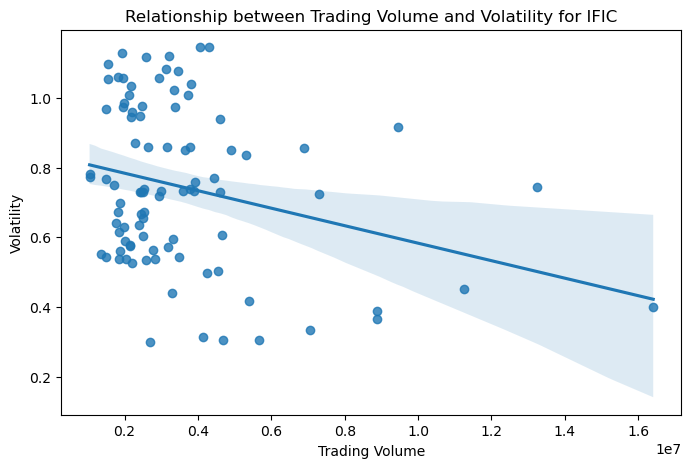

In [27]:
for name in top_5_companies:
    company_data = stock_data[stock_data['Name'] == name]

    # Plotting the relationship between trading volume and volatility with regression line
    plt.figure(figsize = (8, 5))
    company_data['Rolling_Std'] = company_data['Close'].rolling(window = 30).std()
    # Remove rows with missing values
    company_data_cleaned = company_data.dropna(subset = ['Volume', 'Rolling_Std'])

    # Scatter plot with regression line
    sns.regplot(x = company_data_cleaned['Volume'], y = company_data_cleaned['Rolling_Std'])
    plt.title(f'Relationship between Trading Volume and Volatility for {name}')
    plt.xlabel('Trading Volume')
    plt.ylabel('Volatility')

    # Calculate and print the correlation coefficient
    correlation_coefficient = np.corrcoef(company_data_cleaned['Volume'], company_data_cleaned['Rolling_Std'])[0, 1]
    print(f'Correlation Coefficient of {name}: {correlation_coefficient:.2f}')

    plt.show()


# Calculate the correlation matrix between the 'Open' & 'High', 'Low' &'Close' prices.

In [28]:
# Iterate over each top company
for name in top_5_companies:
    # Filter data for the current company
    company_data = stock_data[stock_data['Name'] == name]

    # Calculate correlation matrix
    correlation_matrix = company_data[['Open', 'High', 'Low', 'Close']].corr()

    print(f'Correlation Matrix of {name}:\n{correlation_matrix}\n')


Correlation Matrix of UNIONBANK:
           Open      High       Low     Close
Open   1.000000  0.984464  0.983739  0.969240
High   0.984464  1.000000  0.978242  0.988152
Low    0.983739  0.978242  1.000000  0.984388
Close  0.969240  0.988152  0.984388  1.000000

Correlation Matrix of KEYACOSMET:
           Open      High       Low     Close
Open   1.000000  0.945815  0.965903  0.927996
High   0.945815  1.000000  0.949416  0.973697
Low    0.965903  0.949416  1.000000  0.966941
Close  0.927996  0.973697  0.966941  1.000000

Correlation Matrix of BEXIMCO:
           Open      High       Low     Close
Open   1.000000  0.977330  0.977721  0.955140
High   0.977330  1.000000  0.974154  0.981667
Low    0.977721  0.974154  1.000000  0.983281
Close  0.955140  0.981667  0.983281  1.000000

Correlation Matrix of FUWANGFOOD:
           Open      High       Low     Close
Open   1.000000  0.973726  0.981517  0.951527
High   0.973726  1.000000  0.971483  0.983469
Low    0.981517  0.971483  1.000000  

# Create a heatmap to visualize the correlations using theseabornpackage.

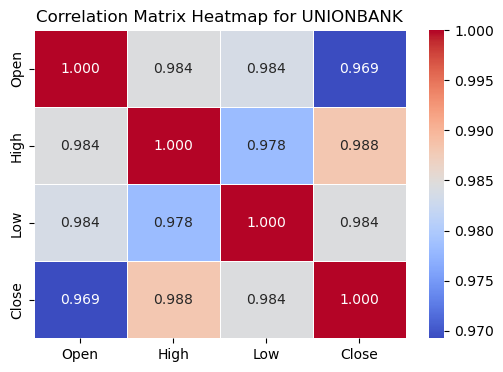

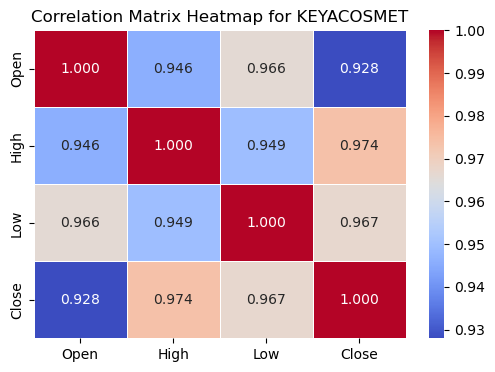

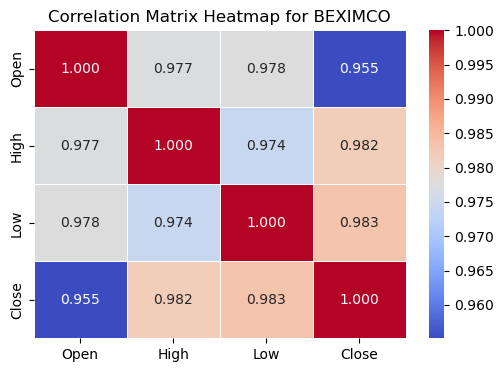

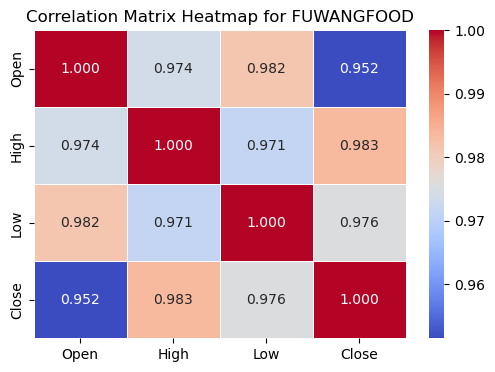

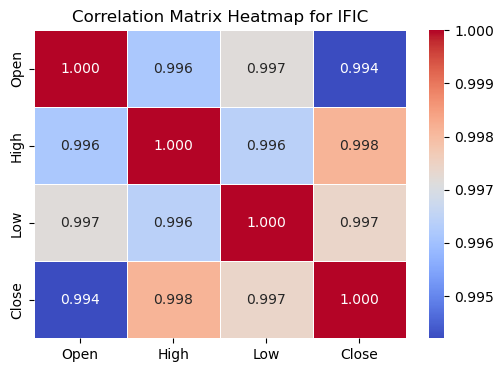

In [29]:
# Iterate over each top company
for name in top_5_companies:
    # Filter data for the current company
    company_data = stock_data[stock_data['Name'] == name]

    # Calculate correlation matrix
    correlation_matrix = company_data[['Open', 'High', 'Low', 'Close']].corr()

    # Create heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', fmt='.3f', linewidths = .5)
    plt.title(f'Correlation Matrix Heatmap for {name}')
    plt.show()
